<img style="float: left;;" src='Figures/alinco.png' /></a>


# <center> <font color= #000047> Módulo 2: Aprendizaje supervizado: Regresión Lineal 

## Introducción

El Aprendizaje Supervizado se podría definir como un tipo de aprendizaje en IA en el que un algoritmo es entrenado con variables que incluyen los valores que queremos predecir; a estos valores conocidos se les llama `“etiquetas”` y se usan también para la evaluación del modelo. El aprendizaje supervisado se puede subdividir en dos tipos: 

- Clasificación

- Regresión.

### Clasificación

En cuanto a clasificación, el objetivo es predecir las etiquetas de clase categóricas de nuevos registros, con base en observaciones pasadas. Dependiendo de la etiqueta, se puede decir que la clasificación es binaria o multiclase. 

### Regresión

Respecto a regresión, se trata del proceso estadístico predictivo en el que el modelo intenta predecir un valor continuo (como ventas, precio, calificaciones) mediante la relación entre variables dependientes e independientes. Es decir, se encuentra una ecuación en la que se sustituyen los valores de las variables y como resultado se obtiene el valor a predecir 

### Algunos algortimos de Aprendizaje Supervizado

- **Regresión lineal:** Se trata de una regresión en la que al graficar la ecuación se forma una línea recta. Para obtener dicha ecuación, se usa el método de los cuadrados mínimos.


- **Regresión logística:** Es una regresión usada principalmente en problemas de clasificación binaria. A pesar de la aparente incongruencia, se trata de una regresión porque el resultado de la ecuación es la probabilidad de que pertenezca a una clase, que dependiendo del umbral que se utilice, se clasifica como positivo o negativo.


- **Support Vector Machine (SVM):** Típicamente se usa para problemas de clasificación, pero también se puede usar para regresión. En este algoritmo se construye un hiperplano que separa las clases de datos lo más posible.


- **Árboles de decisión:** Algoritmo de clasificación similar a un diagrama de flujo, en el que se evalúan valores en cada nodo para llegar a una clasificación al final.


- **Random Forest:** Este algoritmo consiste en combinar una gran cantidad de árboles de decisión independientes entre sí para reducir la varianza. Debido al conjunto de árboles, se le dio el nombre de “bosque”.



## Regresión Lineal (Repaso)


Consideremos un polinomio de grado uno:

$$y = \beta_1 x + \beta_0.$$

Esta es una **línea recta** que tiene pendiente $\beta_1$. Sabemos que habrá una línea conectando dos puntos cualesquiera. Por tanto, *una ecuación polinómica de primer grado es un ajuste perfecto entre dos puntos*.

Si consideramos ahora un polinomio de segundo grado,

$$y = \beta_2 x^2 + \beta_1 x + \beta_0,$$

este se ajustará exactamente a tres puntos. Si aumentamos el grado de la función a la de un polinomio de tercer grado, obtenemos:

$$y = \beta_3 x^3 + \beta_2 x^2 + \beta_1 x + \beta_0,$$

que se ajustará a cuatro puntos.

**Ejemplos**
1. Encontrar la línea recta que pasa exactamente por los puntos $(0,1)$ y $(1,0)$.
2. Encontrar la parábola que pasa exactamente por los puntos $(-1,1)$, $(0,0)$ y $(1,1)$.

**Solución**
1. Consideramos $y=\beta_1 x + \beta_0$. Evaluando en el punto $(0,1)$, obtenemos $\beta_1(0) + \beta_0 = 1$. Ahora, evaluando en el punto $(1,0)$, obtenemos $\beta_1(1) + \beta_0 = 0$. De esta manera,
$$\left[\begin{array}{cc} 1 & 0 \\ 1 & 1\end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1\end{array}\right]=\left[\begin{array}{c} 1 \\ 0\end{array}\right].$$
Resolviendo, $\beta_0=-\beta_1=1$.

In [ ]:
# Importar numpy y el matplotlib.pyplot

In [1]:
import numpy as np


In [2]:
help(np.linalg.solve)

Help on function solve in module numpy.linalg:

solve(a, b)
    Solve a linear matrix equation, or system of linear scalar equations.
    
    Computes the "exact" solution, `x`, of the well-determined, i.e., full
    rank, linear matrix equation `ax = b`.
    
    Parameters
    ----------
    a : (..., M, M) array_like
        Coefficient matrix.
    b : {(..., M,), (..., M, K)}, array_like
        Ordinate or "dependent variable" values.
    
    Returns
    -------
    x : {(..., M,), (..., M, K)} ndarray
        Solution to the system a x = b.  Returned shape is identical to `b`.
    
    Raises
    ------
    LinAlgError
        If `a` is singular or not square.
    
    See Also
    --------
    scipy.linalg.solve : Similar function in SciPy.
    
    Notes
    -----
    
    .. versionadded:: 1.8.0
    
    Broadcasting rules apply, see the `numpy.linalg` documentation for
    details.
    
    The solutions are computed using LAPACK routine ``_gesv``.
    
    `a` must be squa

In [3]:
A = np.array([[1, 0],
              [1, 1]])

h = np.array([1,0])


In [4]:
A

array([[1, 0],
       [1, 1]])

In [5]:
h

array([1, 0])

In [6]:
## h = A*beta
## beta = A^-1 * h

beta = np.linalg.inv(A).dot(h)
beta

array([ 1., -1.])

In [7]:
beta = np.linalg.solve(A,h)

In [8]:
beta

array([ 1., -1.])

In [11]:
import matplotlib.pyplot as plt

2. Consideramos $y=\beta_2 x^2 + \beta_1 x + \beta_0$. Evaluando en el punto $(-1,1)$, obtenemos $\beta_2(-1)^2 + \beta_1(-1) + \beta_0 = 1$. Ahora, evaluando en el punto $(0,0)$, obtenemos $\beta_2(0)^2 + \beta_1(0) + \beta_0 = 0$. Finalmente, evaluando en el punto $(1,1)$, obtenemos $\beta_2(1)^2 + \beta_1(1) + \beta_0 = 1$. De esta manera,
$$\left[\begin{array}{ccc} 1 & -1 & 1 \\ 1 & 0 & 0 \\ 1 & 1 & 1 \end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \\ \beta_2 \end{array}\right]=\left[\begin{array}{c} 1 \\ 0 \\ 1 \end{array}\right].$$
Resolviendo, $\beta_0=\beta_1=0$ y $\beta_2=1$.

In [9]:
A = np.array([[1,-1,1],
              [1,0,0],
              [1,1,1]])
h= np.array([1,0,1])

In [10]:
beta = np.linalg.solve(A,h)
beta

array([0., 0., 1.])

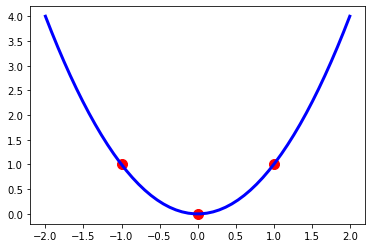

In [13]:
plt.figure(figsize=(6,4))
plt.plot(-1,1, 'ro', ms=10)
plt.plot(0,0, 'ro', ms=10)
plt.plot(1,1, 'ro', ms=10)

x_num = np.linspace(-2,2)
y_num = beta[0] + beta[1]*x_num + beta[2]*x_num**2

plt.plot(x_num,y_num, 'b', lw=3)

### ¿Qué tienen en común los anteriores problemas?
Las curvas están completamente determinadas por los puntos (datos limpios, suficientes y necesarios).

Esto se traduce en que, al llevar el problema a un sistema de ecuaciones lineales, existe una única solución: **no hay necesidad, ni se puede optimizar nada**.

¿Tendremos datos así de '*bonitos*' en la vida real?

La realidad es que los datos que encontraremos en nuestra vida profesional se parecen más a esto...

In [14]:
N=100
x= np.linspace(0,10,N)

y=10 +2 * x + np.random.normal(loc=0,scale=2, size=(N,))


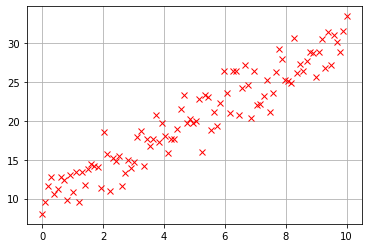

In [15]:
plt.figure(figsize=(6,4))

plt.plot(x,y, 'xr', lw=3)
plt.grid()
plt.show()

### ¿Cómo ajustamos una curva a esto?

Consideramos entonces ajustes de la forma $\hat{f}(x) = \beta_0+\beta_1 x = \left[1 \quad x\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right]=\left[1 \quad x\right]\boldsymbol{\beta}$ (lineas rectas).

Para decir '*mejor*', tenemos que definir algún sentido en que una recta se ajuste *mejor* que otra.

**Mínimos cuadrados**: el objetivo es seleccionar los coeficientes $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$, de forma que la función evaluada en los puntos $x_i$ ($\hat{f}(x_i)$) aproxime los valores correspondientes $y_i$.

La formulación por mínimos cuadrados, encuentra los $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$ que minimiza
$$\frac{1}{2n}\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2=\frac{1}{2n}\sum_{i=1}^{n}(y_i-(\beta_0+ \beta_1x_i))^2=\frac{1}{2n}\sum_{i=1}^{n}(y_i-\left[1 \quad x_i\right]\boldsymbol{\beta})^2=\frac{1}{2n}\left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2,$$

donde $\boldsymbol{y}=\left[y_1\quad\dots\quad y_n\right]^T$, y $\boldsymbol{X}=\left[\begin{array}{ccc}1 & x_1\\ \vdots & \vdots \\ 1 & x_n\end{array}\right].$ Esto es,

$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2$$

### Ejemplo (gradiente descendente)


El objetivo es estimar el modelo $\hat{y} = \hat{f}(x) = \beta_0+\beta_1 x = \left[1 \quad x\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right]=\left[1 \quad x\right]\boldsymbol{\beta}$ (lineas rectas).


In [17]:
import pandas as pd

In [18]:
## ex1data1.txt

In [19]:
data = pd.read_csv('Data/ex1data1.txt', names = ['population','profit'])
data

,population,profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


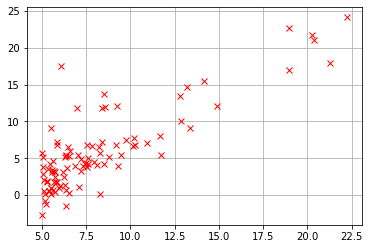

In [20]:
plt.figure(figsize=(6,4))

plt.plot(data['population'],data['profit'], 'xr', lw=3)
plt.grid()
plt.show()

# Implementar la función de costo 

Formalmente definimos la funcion de costo como el error cuadrático medio, qué deberemos minimizar.

$$ J(\beta) = \frac{1}{2m}\sum_{i=1}^m (\hat{y}(x_i) - y_i)^2$$

$\beta = [\beta_0, \beta_1]$

si derivamos parcialmente e igualamos a cero $\frac{\partial J(\beta)}{\partial \beta}=0$

tendríamos que las ecuaciones del algoritmo de gradiente descendente son:

$$ \beta_0 = \beta_0 - \alpha \frac{1}{m} \sum_{i=1}^m (\hat{y}(x_i) - y_i)$$

$$ \beta_1 = \beta_1 - \alpha \frac{1}{m} \sum_{i=1}^m (\hat{y}(x_i) - y_i)x_i$$



In [ ]:
#Graficar un función de costo cualquiera


$$X=[1;x]$$
$$\beta=[\beta_0;\beta_1]$$
$$\hat{y}=X^T\beta = \beta_1 x +\beta_0$$


### implementacion de la función de costo

In [21]:
def cost_function(X, y, beta):
    m=len(y)
    J = np.sum((X.dot(beta) -y)**2)/(2*m)
    return J

In [23]:
X_df = pd.DataFrame(data['population'])

In [24]:
X_df['intercept'] = 1

In [25]:
X_df

,population,intercept
0,6.1101,1
1,5.5277,1
2,8.5186,1
3,7.0032,1
4,5.8598,1
...,...,...
92,5.8707,1
93,5.3054,1
94,8.2934,1
95,13.3940,1


In [26]:
Y_df = pd.DataFrame(data['profit'])

In [27]:
Y_df

,profit
0,17.59200
1,9.13020
2,13.66200
3,11.85400
4,6.82330
...,...
92,7.20290
93,1.98690
94,0.14454
95,9.05510


In [45]:
beta = np.array([0,0])

In [46]:
X = X_df.values
y = Y_df.values.flatten()

In [47]:
cost_function(X,y, beta)

32.072733877455676

$$ \beta_0 = \beta_0 - \alpha \frac{1}{m} \sum_{i=1}^m (\hat{y}(x_i) - y_i)$$

$$ \beta_1 = \beta_1 - \alpha \frac{1}{m} \sum_{i=1}^m (\hat{y}(x_i) - y_i)x_i$$



In [48]:
#algoritmo de gradiente descendente
def gradiente_descent(X,y, beta, alpha, iterations):
    cost_history = [0]*iterations
    
    m = len(y)
    
    for iteration in range(iterations):
        y_hat = X.dot(beta)
        loss = (y_hat - y)
        gradiente = X.T.dot(loss)/m
        beta = beta - alpha*gradiente
        cost = cost_function(X,y, beta)
        cost_history[iteration] = cost
        
    return beta, cost_history

In [49]:
#inicializamos los parámetros
iterations = 1500
alpha = 0.01
beta = np.array([0,0])
(beta,cost_history) = gradiente_descent(X,y, beta, alpha, iterations)

In [50]:
beta

array([ 1.16636235, -3.63029144])

$$\hat{y} = 1.166 x - 3.63$$

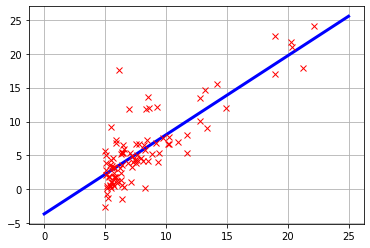

In [52]:
# Graficar la recta resultamte que más se ajusta a lso datos
plt.figure(figsize=(6,4))

x_num = np.linspace(0,25,2)
y_num = beta[1] + beta[0]*x_num

plt.plot(x_num,y_num, 'b', lw=3)
plt.plot(data['population'],data['profit'], 'xr', lw=3)
plt.grid()
plt.show()

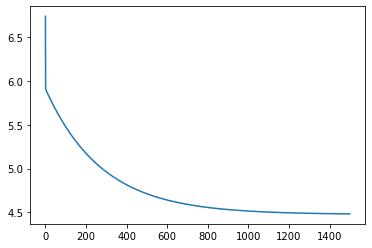

In [53]:
plt.plot(cost_history)

In [ ]:
# Predecir un nuevo valor

# y_pred = [x,1]*beta


## Ejemplo (scipy)

In [54]:
# Importar el módulo optimize de la librería scipy
from scipy import optimize as opt

In [55]:
# Función minimize
help(opt.minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where ``x`` is an 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see her

Parámetros importantes:
- fun: función $f(x)$, se debe definir antes de llamar minimize, como `def f(x): ... return ...`
- x0: valor inicial. En una función no lineal, en general, hay múltiples mínimos. Dependiendo de la semilla caerá en uno de esos mínimos. Se ingresa como $x0 = \text{np.array}([x_{01},\dots,x_{0n}])$.
- bounds: como en linprog.
- constraints: funciones que definen las restricciones $g_i(x)$ y $h_j(x)$. Se definen igual que $f(x)$ y se ingresan como {'ineq': g_i, 'eq': h_j}.

Primero debemos construir la función objetivo y la semilla inicial:

In [56]:
def min_error_cuadratico_medio(beta, x_points, y_points):
    m = len(y_points)
    y_hat = beta[0] + beta[1]*x_points
    J = (1/(2*m))*((y_points - y_hat)**2).sum()
    
    return J

In [57]:
beta_ini = [0,0]

In [58]:
X_df

,population,intercept
0,6.1101,1
1,5.5277,1
2,8.5186,1
3,7.0032,1
4,5.8598,1
...,...,...
92,5.8707,1
93,5.3054,1
94,8.2934,1
95,13.3940,1


In [59]:
y

array([17.592  ,  9.1302 , 13.662  , 11.854  ,  6.8233 , 11.886  ,
        4.3483 , 12.     ,  6.5987 ,  3.8166 ,  3.2522 , 15.505  ,
        3.1551 ,  7.2258 ,  0.71618,  3.5129 ,  5.3048 ,  0.56077,
        3.6518 ,  5.3893 ,  3.1386 , 21.767  ,  4.263  ,  5.1875 ,
        3.0825 , 22.638  , 13.501  ,  7.0467 , 14.692  , 24.147  ,
       -1.22   ,  5.9966 , 12.134  ,  1.8495 ,  6.5426 ,  4.5623 ,
        4.1164 ,  3.3928 , 10.117  ,  5.4974 ,  0.55657,  3.9115 ,
        5.3854 ,  2.4406 ,  6.7318 ,  1.0463 ,  5.1337 ,  1.844  ,
        8.0043 ,  1.0179 ,  6.7504 ,  1.8396 ,  4.2885 ,  4.9981 ,
        1.4233 , -1.4211 ,  2.4756 ,  4.6042 ,  3.9624 ,  5.4141 ,
        5.1694 , -0.74279, 17.929  , 12.054  , 17.054  ,  4.8852 ,
        5.7442 ,  7.7754 ,  1.0173 , 20.992  ,  6.6799 ,  4.0259 ,
        1.2784 ,  3.3411 , -2.6807 ,  0.29678,  3.8845 ,  5.7014 ,
        6.7526 ,  2.0576 ,  0.47953,  0.20421,  0.67861,  7.5435 ,
        5.3436 ,  4.2415 ,  6.7981 ,  0.92695,  0.152  ,  2.82

In [60]:
x = X_df['population'].values

In [61]:
soulcion = opt.minimize(fun=min_error_cuadratico_medio, x0=beta_ini, args=(x,y))

In [62]:
soulcion

      fun: 4.476971375980148
 hess_inv: array([[ 5.34759078, -0.53380738],
       [-0.53380738,  0.0655349 ]])
      jac: array([-4.76837158e-07,  9.00030136e-06])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 8
     njev: 9
   status: 0
  success: True
        x: array([-3.89578794,  1.19303445])

In [63]:
beta = soulcion.x
beta

array([-3.89578794,  1.19303445])

$$\hat{y} = 1.19 x - 3.89$$

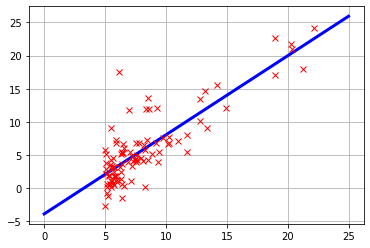

In [65]:
# Grafica de los puntos y la recta ajustada
# Graficar la recta resultamte que más se ajusta a lso datos
plt.figure(figsize=(6,4))

x_num = np.linspace(0,25,2)
y_num = beta[0] + beta[1]*x_num

plt.plot(x_num,y_num, 'b', lw=3)
plt.plot(data['population'],data['profit'], 'xr', lw=3)
plt.grid()
plt.show()

## Ejemplo Usando la librería de sklearn

### Ejemplo1:

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
data

,population,profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [69]:
X_df

,population,intercept
0,6.1101,1
1,5.5277,1
2,8.5186,1
3,7.0032,1
4,5.8598,1
...,...,...
92,5.8707,1
93,5.3054,1
94,8.2934,1
95,13.3940,1


In [70]:
Y_df

,profit
0,17.59200
1,9.13020
2,13.66200
3,11.85400
4,6.82330
...,...
92,7.20290
93,1.98690
94,0.14454
95,9.05510


In [71]:
x

array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
        8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
        5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
       20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
       13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
        7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
       11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
        5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
        6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
       14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
       10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
        5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
        6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
        7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369])

In [72]:
y

array([17.592  ,  9.1302 , 13.662  , 11.854  ,  6.8233 , 11.886  ,
        4.3483 , 12.     ,  6.5987 ,  3.8166 ,  3.2522 , 15.505  ,
        3.1551 ,  7.2258 ,  0.71618,  3.5129 ,  5.3048 ,  0.56077,
        3.6518 ,  5.3893 ,  3.1386 , 21.767  ,  4.263  ,  5.1875 ,
        3.0825 , 22.638  , 13.501  ,  7.0467 , 14.692  , 24.147  ,
       -1.22   ,  5.9966 , 12.134  ,  1.8495 ,  6.5426 ,  4.5623 ,
        4.1164 ,  3.3928 , 10.117  ,  5.4974 ,  0.55657,  3.9115 ,
        5.3854 ,  2.4406 ,  6.7318 ,  1.0463 ,  5.1337 ,  1.844  ,
        8.0043 ,  1.0179 ,  6.7504 ,  1.8396 ,  4.2885 ,  4.9981 ,
        1.4233 , -1.4211 ,  2.4756 ,  4.6042 ,  3.9624 ,  5.4141 ,
        5.1694 , -0.74279, 17.929  , 12.054  , 17.054  ,  4.8852 ,
        5.7442 ,  7.7754 ,  1.0173 , 20.992  ,  6.6799 ,  4.0259 ,
        1.2784 ,  3.3411 , -2.6807 ,  0.29678,  3.8845 ,  5.7014 ,
        6.7526 ,  2.0576 ,  0.47953,  0.20421,  0.67861,  7.5435 ,
        5.3436 ,  4.2415 ,  6.7981 ,  0.92695,  0.152  ,  2.82

In [74]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [88]:
x

array([[ 6.1101],
       [ 5.5277],
       [ 8.5186],
       [ 7.0032],
       [ 5.8598],
       [ 8.3829],
       [ 7.4764],
       [ 8.5781],
       [ 6.4862],
       [ 5.0546],
       [ 5.7107],
       [14.164 ],
       [ 5.734 ],
       [ 8.4084],
       [ 5.6407],
       [ 5.3794],
       [ 6.3654],
       [ 5.1301],
       [ 6.4296],
       [ 7.0708],
       [ 6.1891],
       [20.27  ],
       [ 5.4901],
       [ 6.3261],
       [ 5.5649],
       [18.945 ],
       [12.828 ],
       [10.957 ],
       [13.176 ],
       [22.203 ],
       [ 5.2524],
       [ 6.5894],
       [ 9.2482],
       [ 5.8918],
       [ 8.2111],
       [ 7.9334],
       [ 8.0959],
       [ 5.6063],
       [12.836 ],
       [ 6.3534],
       [ 5.4069],
       [ 6.8825],
       [11.708 ],
       [ 5.7737],
       [ 7.8247],
       [ 7.0931],
       [ 5.0702],
       [ 5.8014],
       [11.7   ],
       [ 5.5416],
       [ 7.5402],
       [ 5.3077],
       [ 7.4239],
       [ 7.6031],
       [ 6.3328],
       [ 6

In [75]:
# Aplicar el modelo
# y_hat = beta_1*x + beta_0
model = LinearRegression()
# Entrenamiento del modelo
model.fit(x,y)

LinearRegression()

- **model.coef**: Coeficientes que acompañan a la variable independiente $\beta_1, ..., \beta_n$

In [85]:
model.coef_[0][0]

1.193033644189594

- **model.intercept_**: Coeficiente de intercepción al eje de las abcisas $\beta_0$

In [83]:
model.intercept_

array([-3.89578088])

### Modelo obtenido:
$$ \hat{y} = 1.19x -3.895$$

In [80]:
model.coef_[0][0]

1.193033644189594

In [81]:
beta = [model.intercept_[0], model.coef_[0][0]]

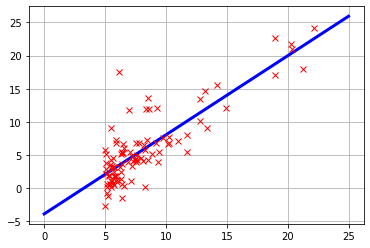

In [82]:
# Graficar la recta resultamte que más se ajusta a lso datos

plt.figure(figsize=(6,4))

x_num = np.linspace(0,25,2)
y_num = beta[0] + beta[1]*x_num

plt.plot(x_num,y_num, 'b', lw=3)
plt.plot(data['population'],data['profit'], 'xr', lw=3)
plt.grid()
plt.show()

#### ¿Cómo predecir un nuevo elemento?

In [90]:
np.array([23,28,31]).reshape(1,-1).T

array([[23],
       [28],
       [31]])

In [91]:
model.predict(np.array([23,28,31]).reshape(1,-1).T)

array([[23.54399294],
       [29.50916116],
       [33.08826209]])

## Ejemplo 2:

In [93]:
datos = pd.read_csv('Data/Position_Salaries.csv')
datos

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [94]:
x = datos['Level'].values.reshape(-1,1)
y = datos['Salary'].values.reshape(-1,1)


Text(0, 0.5, 'Salary')

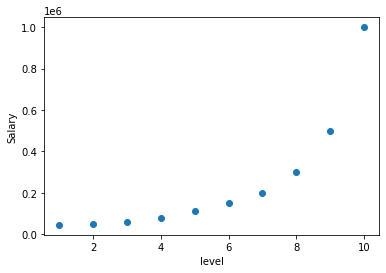

In [95]:
plt.figure(figsize=(6,4))
plt.scatter(x,y)
plt.xlabel('level')
plt.ylabel('Salary')

In [96]:
from sklearn.metrics import mean_squared_error, r2_score

Error cuadrático medio: 26695878787.878788
r2_score: 0.6690412331929895


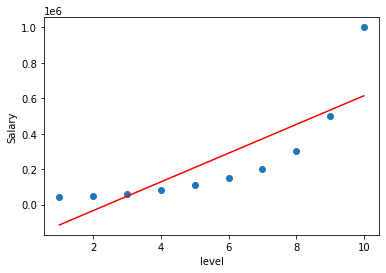

In [97]:
# Aplicar un Modelo de regresión Lineal

#1.- Entrenamiento del modelo con sklearn
model = LinearRegression()
model.fit(x,y)
#2.- Predecir los valores de x
y_pred = model.predict(x)

#3.- Graficar el modelo con los datos
plt.figure(figsize=(6,4))
plt.scatter(x,y)
plt.plot(x, y_pred, 'r')
plt.xlabel('level')
plt.ylabel('Salary')
#4.- Obtener el error del modelo : mean_squared_error(y,y_pred)
print('Error cuadrático medio: ' + str(mean_squared_error(y,y_pred)))
print('r2_score: ' + str(r2_score(y,y_pred)))

## Regresión Polinomial

### Aplicar un modelo polinomial de grado 2

In [ ]:
# y_hat = beta_2*x^2 + beta_1*x + beta_0

In [98]:
from sklearn.preprocessing import PolynomialFeatures

In [113]:
poly = PolynomialFeatures(degree = 3, include_bias = True)

In [114]:
x_poly = poly.fit_transform(x)

In [115]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [116]:
x_poly
# y_hat = X.dot(beta)
# beta = [b0,b1,b2 ]
# Y_hat = b0 + b1*x + b2*x^2

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

Error cuadrático medio: 1515662004.6620033
r2_score: 0.9812097727913367


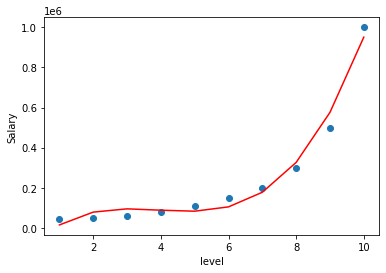

In [117]:
# Aplicar un Modelo de regresión Lineal

#1.- Entrenamiento del modelo con sklearn
model = LinearRegression()
model.fit(x_poly,y)
#2.- Predecir los valores de x
y_pred = model.predict(x_poly)

#3.- Graficar el modelo con los datos
plt.figure(figsize=(6,4))
plt.scatter(x,y)
plt.plot(x, y_pred, 'r')
plt.xlabel('level')
plt.ylabel('Salary')
#4.- Obtener el error del modelo : mean_squared_error(y,y_pred)
print('Error cuadrático medio: ' + str(mean_squared_error(y,y_pred)))
print('r2_score: ' + str(r2_score(y,y_pred)))

## Actividad : Predecir los niveles utilizando un modelo polinomial de grado 3

- Crear un modelo polinomial de grado 3
- Predecir los siguientes niveles: x_new=[11, 13, 15]
- Graficar los salarios de los valores de x_new

$$\hat{y} = \beta_3 x^3 + \beta_2 x^2 + \beta_1 x + \beta_0$$

In [119]:
model.coef_

array([[     0.        , 180664.33566432, -48548.95104895,
          4120.04662005]])

In [125]:
b3 = model.coef_[0,3]
b2 = model.coef_[0,2]
b1 = model.coef_[0,1]
b0 = model.intercept_[0]

In [126]:
x_new = 11
y_new_pred = b3*x_new**3 + b2*x_new**2 + b1*x_new + b0
y_new_pred

1475333.3333333111

In [127]:
x_new = np.array([[11]])
x_new_poly = poly.fit_transform(x_new)
x_new_poly

array([[1.000e+00, 1.100e+01, 1.210e+02, 1.331e+03]])

In [128]:
y_new_pred = model.predict(x_new_poly)
y_new_pred

array([[1475333.33333331]])

In [131]:
x_new = np.array([[11],[13],[15]])
x_new_poly = poly.fit_transform(x_new)
x_new_poly

array([[1.000e+00, 1.100e+01, 1.210e+02, 1.331e+03],
       [1.000e+00, 1.300e+01, 1.690e+02, 2.197e+03],
       [1.000e+00, 1.500e+01, 2.250e+02, 3.375e+03]])

In [132]:
y_new_pred = model.predict(x_new_poly)
y_new_pred

array([[1475333.33333331],
       [3074272.72727266],
       [5570275.05827491]])

## Regresión Lineal Multiple

## Ejemplo

In [133]:
dataset = pd.read_csv('Data/50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [134]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [135]:
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [136]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [137]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [139]:
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [3])],
                       remainder='passthrough')
X = np.array(ct.fit_transform(X))
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [ ]:
# y_hat = b0 + b1*x1 + b2*x2+ ... + b6*x6

In [140]:
# construir el modelo de regresión multiple
modelo_multiple = LinearRegression()

In [141]:
#entrenando al modelo
modelo_multiple.fit(X,y)
y_pred = modelo_multiple.predict(X)
y_pred

array([192390.57136321, 189071.32010493, 182276.18673285, 173584.97618976,
       172277.13381668, 163473.80711842, 158099.29278418, 160155.64464938,
       151634.74332631, 154829.66252709, 135664.64259064, 135528.60078161,
       129282.91780691, 127431.24898632, 149694.38277549, 146143.63551379,
       116854.0745287 , 130085.40993358, 129149.72574274, 115594.18840731,
       116570.73444001, 117201.50508973, 114833.30513843, 110123.79610587,
       113294.37345155, 102200.26891867, 110765.30116879, 114279.8040301 ,
       101818.5873869 , 101721.0420294 ,  99629.0105373 ,  97617.2963202 ,
        98988.23660304,  98061.35894838,  88974.70416293,  90420.0096061 ,
        75423.09286559,  89577.70222197,  69606.52160904,  83684.97603991,
        74762.74617647,  74956.31104908,  70575.99371382,  60100.2682187 ,
        64585.14721291,  47588.36470993,  56272.99268495,  46468.23200484,
        49123.07308287,  48185.03879259])

In [142]:
modelo_multiple.coef_

array([-5.23005912e+01,  1.46488202e+02, -9.41876104e+01,  8.06023114e-01,
       -2.70043196e-02,  2.69798610e-02])

In [143]:
modelo_multiple.intercept_

50177.64442290499

In [145]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


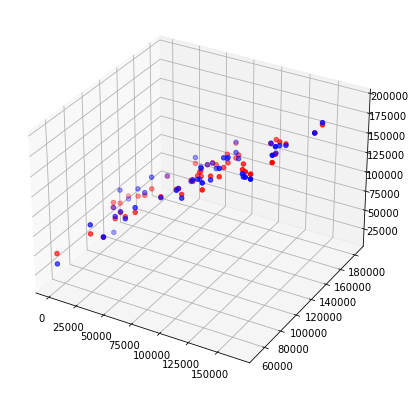

In [150]:
#Elegir 3 variables para graficar
fig = plt.figure(figsize=(10,7))
ax=plt.axes(projection='3d')

ax.scatter3D(dataset['R&D Spend'], dataset['Administration'], dataset['Profit'], c='b')
ax.scatter3D(dataset['R&D Spend'], dataset['Administration'], y_pred, c='r')


In [151]:
# 1.- Evaluando el modelo con r2 score
r2_score(y,y_pred)

0.9507524843355148

In [ ]:
# 2.- escriban el modelo matemático obtenido y_hat = ...

$$\hat{y} = \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3+ \beta_4 x_4 + \beta_5 x_5 + \beta_6 x_6 + \beta_0$$

In [ ]:
# 3.- Evaluar el modelo con la ecuación matemática (utilizar los elementos de model.coef_, model.intercept_)


In [ ]:
# 4.- Predecir el profit para una start_up nueva (R&D Spend, Administration, Marketing Spend, State)